In [1]:
from google.colab import files
uploaded = files.upload()

Saving ratings_small.csv to ratings_small.csv


In [2]:
import sys
!{sys.executable} -m pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 25.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633997 sha256=16035d2f63a30ddb4b0eaf8579e34d306e4e1994035282c64ca3a3ea5e79ad34
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
%matplotlib inline

In [4]:
import io
ratings = pd.read_csv(io.BytesIO(uploaded['ratings_small.csv']))

In [5]:
ratings = pd.read_csv('ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


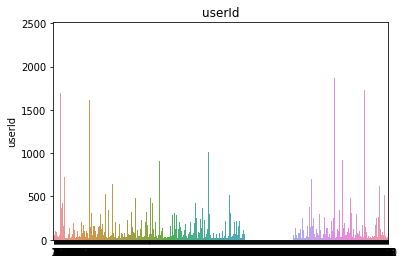

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


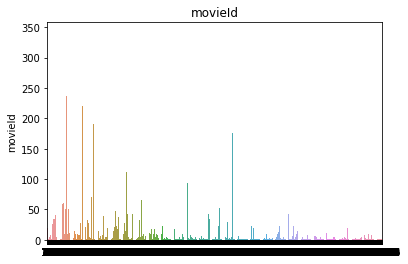

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


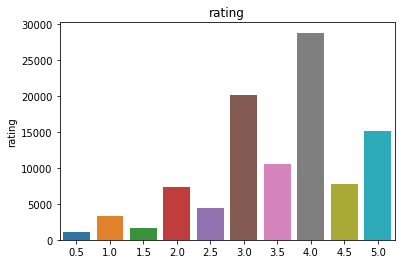

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


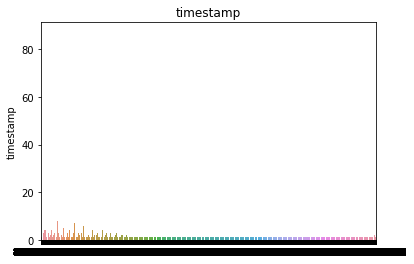

In [41]:
for i in ratings.columns:
    sns.barplot(ratings[i].value_counts().index,ratings[i].value_counts()).set_title(i)
    plt.show()

In [8]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [9]:
probabilistic_matrix_factorization_svd = SVD(biased = False)
cv_pmf = cross_validate(probabilistic_matrix_factorization_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0092  1.0021  1.0112  1.0167  1.0153  1.0109  0.0052  
MAE (testset)     0.7793  0.7725  0.7795  0.7838  0.7831  0.7796  0.0040  
Fit time          5.83    7.83    3.82    3.81    3.85    5.03    1.60    
Test time         0.18    0.15    0.14    0.16    0.09    0.14    0.03    


In [10]:
cv_pmf

{'test_rmse': array([1.00920032, 1.00210672, 1.01121681, 1.01672659, 1.01530588]),
 'test_mae': array([0.77929949, 0.77249168, 0.77945104, 0.78380247, 0.78312685]),
 'fit_time': (5.832298278808594,
  7.825253009796143,
  3.8213348388671875,
  3.814286947250366,
  3.8471689224243164),
 'test_time': (0.1772146224975586,
  0.1463909149169922,
  0.1443767547607422,
  0.16409921646118164,
  0.0897986888885498)}

In [11]:
print('Avg MAE for PMF Collaborative Filtering: ', cv_pmf['test_mae'].mean())
print('Avg RMSE for PMF Collaborative Filtering: ', cv_pmf['test_rmse'].mean())

Avg MAE for PMF Collaborative Filtering:  0.7796343055528482
Avg RMSE for PMF Collaborative Filtering:  1.0109112644472504


In [12]:
sim_options = {'user_based': True}
user_based_collaborative_filtering = KNNBasic(sim_options=sim_options)
user_based_cv = cross_validate(user_based_collaborative_filtering, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9684  0.9638  0.9645  0.9784  0.9718  0.9694  0.0054  
MAE (testset)     0.7459  0.7418  0.7400  0.7514  0.7465  0.7451  0.0040  
Fit time          0.08    0.09    0.21    0.24    0.25    0.17    0.07    
Test time         1.49    2.32    2.50    2.60    3.11    2.40    0.52    


In [13]:
print('Avg MAE for User-based Collaborative Filtering: ', user_based_cv['test_mae'].mean())
print('Avg RMSE for User-based Collaborative Filtering: ', user_based_cv['test_rmse'].mean())

Avg MAE for User-based Collaborative Filtering:  0.745099554150006
Avg RMSE for User-based Collaborative Filtering:  0.9693804468105924


In [14]:
sim_options = {'user_based': False}
item_based_collaborative_filtering = KNNBasic(sim_options=sim_options)
item_based_cv = cross_validate(item_based_collaborative_filtering, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9462  0.9245  0.9325  0.9310  0.9382  0.9345  0.0073  
MAE (testset)     0.7275  0.7136  0.7192  0.7194  0.7234  0.7206  0.0047  
Fit time          3.09    2.80    2.52    3.33    2.82    2.91    0.28    
Test time         4.87    5.07    5.92    6.05    5.64    5.51    0.47    


In [15]:
print('Avg MAE for Item-based Collaborative Filtering: ', item_based_cv['test_mae'].mean())
print('Avg RMSE for Item-based Collaborative Filtering: ', item_based_cv['test_rmse'].mean())

Avg MAE for Item-based Collaborative Filtering:  0.7206162062985768
Avg RMSE for Item-based Collaborative Filtering:  0.9344949580853376


In [16]:
sim_options = {'name':'cosine', 'user_based': True}
user_based_cosine_metric = KNNBasic(sim_options=sim_options);
cv_user_based_cosine_metric = cross_validate(user_based_cosine_metric, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9846  0.9916  0.9943  0.9913  1.0021  0.9928  0.0057  
MAE (testset)     0.7610  0.7669  0.7684  0.7658  0.7739  0.7672  0.0042  
Fit time          0.32    0.51    0.34    0.71    0.35    0.45    0.15    
Test time         1.42    1.22    1.22    1.50    1.74    1.42    0.19    


In [17]:
sim_options = {'name':'msd', 'user_based': True}
user_based_msd_metric = KNNBasic(sim_options=sim_options);
cv_user_based_msd_metric = cross_validate(user_based_msd_metric, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9736  0.9648  0.9630  0.9728  0.9631  0.9674  0.0047  
MAE (testset)     0.7462  0.7407  0.7426  0.7497  0.7399  0.7438  0.0037  
Fit time          0.11    0.10    0.10    0.10    0.10    0.10    0.00    
Test time         1.21    1.33    1.17    1.19    1.31    1.24    0.07    


In [18]:
sim_options = {'name':'pearson', 'user_based': True}
user_based_pearson_metric = KNNBasic(sim_options=sim_options);
cv_user_based_pearson_metric = cross_validate(user_based_pearson_metric, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0006  0.9902  0.9957  1.0027  0.9992  0.9977  0.0044  
MAE (testset)     0.7729  0.7679  0.7699  0.7760  0.7765  0.7727  0.0033  
Fit time          0.48    0.48    0.48    0.51    0.49    0.49    0.01    
Test time         1.17    1.32    1.20    1.21    1.60    1.30    0.16    


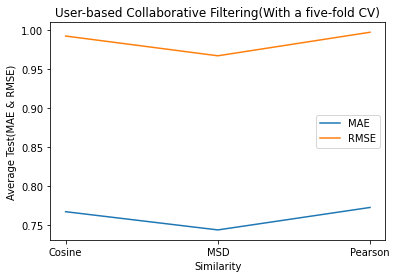

In [19]:
x = [0,1,2]
y_mae = [cv_user_based_cosine_metric['test_mae'].mean(),cv_user_based_msd_metric['test_mae'].mean(),cv_user_based_pearson_metric['test_mae'].mean()]
y_rmse = [cv_user_based_cosine_metric['test_rmse'].mean(),cv_user_based_msd_metric['test_rmse'].mean(),cv_user_based_pearson_metric['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('User-based Collaborative Filtering(With a five-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE & RMSE)')
plt.show()

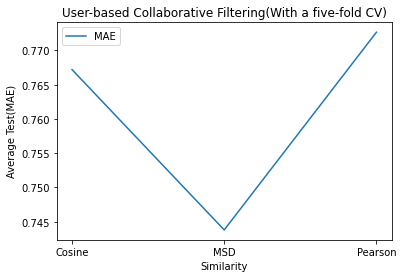

In [37]:
x = [0,1,2]
y_mae = [cv_user_based_cosine_metric['test_mae'].mean(),cv_user_based_msd_metric['test_mae'].mean(),cv_user_based_pearson_metric['test_mae'].mean()]
y_rmse = [cv_user_based_cosine_metric['test_rmse'].mean(),cv_user_based_msd_metric['test_rmse'].mean(),cv_user_based_pearson_metric['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.title('User-based Collaborative Filtering(With a five-fold CV)')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE)')
plt.show()

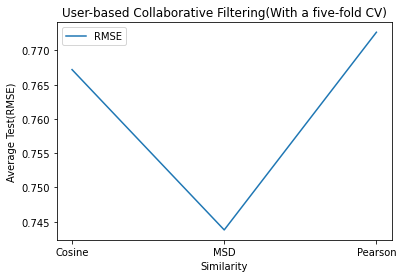

In [38]:
x = [0,1,2]
y_mae = [cv_user_based_cosine_metric['test_mae'].mean(),cv_user_based_msd_metric['test_mae'].mean(),cv_user_based_pearson_metric['test_mae'].mean()]
y_rmse = [cv_user_based_cosine_metric['test_rmse'].mean(),cv_user_based_msd_metric['test_rmse'].mean(),cv_user_based_pearson_metric['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.title('User-based Collaborative Filtering(With a five-fold CV)')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(RMSE)')
plt.show()

In [20]:
sim_options = {'name':'cosine', 'user_based': False}
item_based_cosine_metric = KNNBasic(sim_options=sim_options);
cv_item_based_cosine_metric = cross_validate(item_based_cosine_metric, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9954  0.9921  0.9941  0.9869  1.0107  0.9958  0.0080  
MAE (testset)     0.7753  0.7699  0.7744  0.7698  0.7850  0.7749  0.0056  
Fit time          9.67    9.60    9.53    9.31    9.52    9.53    0.12    
Test time         5.18    5.18    5.77    5.38    5.18    5.34    0.23    


In [21]:
sim_options = {'name':'msd', 'user_based': False}
item_based_msd_metric = KNNBasic(sim_options=sim_options);
cv_item_based_msd_metric = cross_validate(item_based_msd_metric, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9392  0.9359  0.9424  0.9350  0.9244  0.9354  0.0061  
MAE (testset)     0.7258  0.7224  0.7257  0.7198  0.7123  0.7212  0.0050  
Fit time          2.76    3.12    2.65    2.59    2.68    2.76    0.19    
Test time         5.18    5.15    5.48    5.05    5.28    5.23    0.15    


In [22]:
sim_options = {'name':'pearson', 'user_based': False}
item_based_pearson_metric = KNNBasic(sim_options=sim_options);
cv_item_based_pearson_metric = cross_validate(item_based_pearson_metric, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0047  0.9906  0.9879  0.9837  0.9859  0.9906  0.0074  
MAE (testset)     0.7803  0.7682  0.7680  0.7630  0.7636  0.7686  0.0062  
Fit time          14.22   13.92   19.21   13.22   13.31   14.78   2.25    
Test time         4.92    5.93    5.22    5.23    5.65    5.39    0.36    


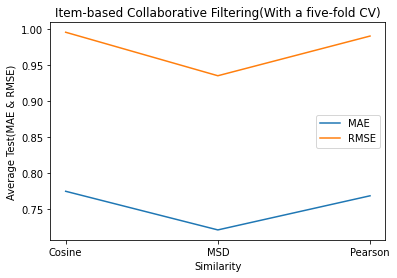

In [23]:
x = [0,1,2]
y_mae = [cv_item_based_cosine_metric['test_mae'].mean(),cv_item_based_msd_metric['test_mae'].mean(),cv_item_based_pearson_metric['test_mae'].mean()]
y_rmse = [cv_item_based_cosine_metric['test_rmse'].mean(),cv_item_based_msd_metric['test_rmse'].mean(),cv_item_based_pearson_metric['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('Item-based Collaborative Filtering(With a five-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE & RMSE)')
plt.show()

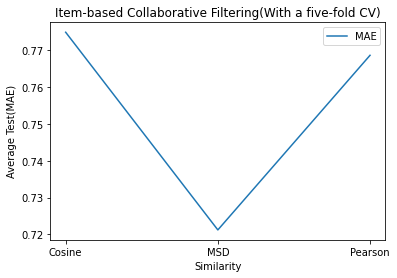

In [35]:
x = [0,1,2]
y_mae = [cv_item_based_cosine_metric['test_mae'].mean(),cv_item_based_msd_metric['test_mae'].mean(),cv_item_based_pearson_metric['test_mae'].mean()]
y_rmse = [cv_item_based_cosine_metric['test_rmse'].mean(),cv_item_based_msd_metric['test_rmse'].mean(),cv_item_based_pearson_metric['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.title('Item-based Collaborative Filtering(With a five-fold CV)')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE)')
plt.show()

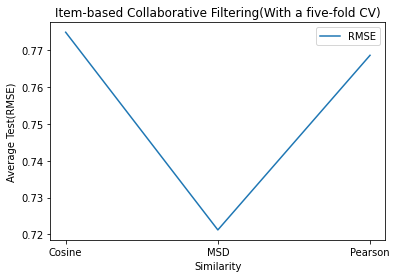

In [36]:
x = [0,1,2]
y_mae = [cv_item_based_cosine_metric['test_mae'].mean(),cv_item_based_msd_metric['test_mae'].mean(),cv_item_based_pearson_metric['test_mae'].mean()]
y_rmse = [cv_item_based_cosine_metric['test_rmse'].mean(),cv_item_based_msd_metric['test_rmse'].mean(),cv_item_based_pearson_metric['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.title('Item-based Collaborative Filtering(With a five-fold CV)')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(RMSE)')
plt.show()

In [24]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 42)

In [25]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,40,2))
for i in k1:
  ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  ubc_nn.fit(trainset)
  predictions = ubc_nn.test(testset)
  ubc_nn_mae.append(accuracy.mae(predictions))
  ubc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7426
RMSE: 0.9684
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7415
RMSE: 0.9665
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7420
RMSE: 0.9664
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7426
RMSE: 0.9666
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7428
RMSE: 0.9665
Computing 

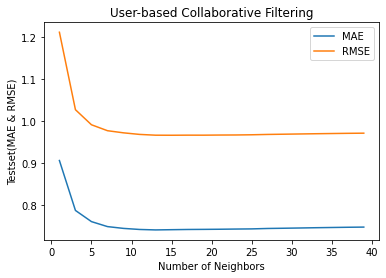

In [26]:
plt.plot(k1,ubc_nn_mae)
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('User-based Collaborative Filtering')
plt.show()

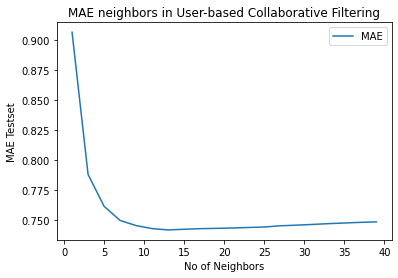

In [27]:
plt.plot(k1,ubc_nn_mae)
plt.xlabel('No of Neighbors')
plt.ylabel('MAE Testset')
plt.legend(['MAE'])
plt.title('MAE neighbors in User-based Collaborative Filtering')
plt.show()

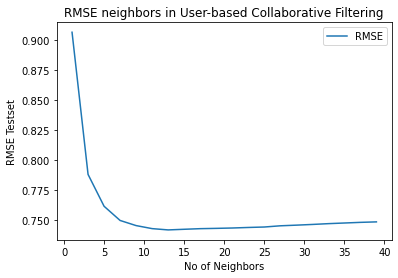

In [28]:
plt.plot(k1,ubc_nn_mae)
plt.xlabel('No of Neighbors')
plt.ylabel('RMSE Testset')
plt.legend(['RMSE'])
plt.title('RMSE neighbors in User-based Collaborative Filtering')
plt.show()

In [29]:
#Best K
k_ubc = ubc_nn_rmse.index(min(ubc_nn_rmse))+1
print('Best Value of K : ', k_ubc)
print('Minimum RMSE : ', min(ubc_nn_rmse))

Best Value of K :  8
Minimum RMSE :  0.9663589276453397


In [30]:
ibc_nn_mae = []
ibc_nn_rmse = []
for i in k1:
  ibc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  ibc_nn.fit(trainset)
  predictions = ibc_nn.test(testset)
  ibc_nn_mae.append(accuracy.mae(predictions))
  ibc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9703
RMSE: 1.3138
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8337
RMSE: 1.0839
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7966
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7765
RMSE: 1.0013
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7659
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7581
RMSE: 0.9768
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7515
RMSE: 0.9687
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7474
RMSE: 0.9639
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7445
RMSE: 0.9602
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7419
RMSE: 0.9569
Computing 

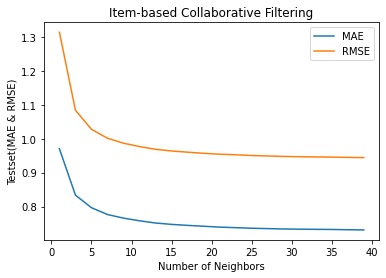

In [31]:
plt.plot(k1,ibc_nn_mae)
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('Item-based Collaborative Filtering')
plt.show()

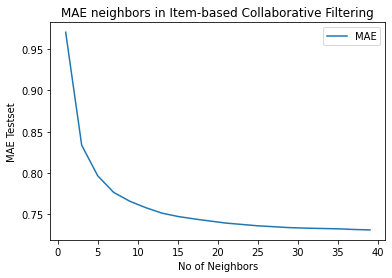

In [32]:
plt.plot(k1,ibc_nn_mae)
plt.xlabel('No of Neighbors')
plt.ylabel('MAE Testset')
plt.legend(['MAE'])
plt.title('MAE neighbors in Item-based Collaborative Filtering')
plt.show()

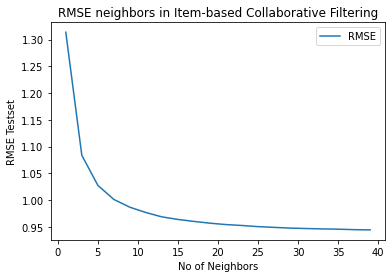

In [33]:
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('No of Neighbors')
plt.ylabel('RMSE Testset')
plt.legend(['RMSE'])
plt.title('RMSE neighbors in Item-based Collaborative Filtering')
plt.show()

In [34]:
#Best K
k_ibc = ibc_nn_rmse.index(min(ibc_nn_rmse))+1
print('Best Value of K : ', k_ibc)
print('Minimum RMSE : ', min(ibc_nn_rmse))

Best Value of K :  20
Minimum RMSE :  0.9443302041509952
